
### Autograd에서 미분(differentiation)

autograd 가 어떻게 변화도(gradient)를 수집하는지 살펴보겠습니다. requires_grad=True 를 갖는 2개의 텐서(tensor) a 와 b 를 만듭니다. requires_grad=True 는 autograd 에 모든 연산(operation)들을 추적해야 한다고 알려줍니다.



In [12]:
import torch

In [13]:
a = torch.tensor([2,3], dtype = float, requires_grad = True)
b = torch.tensor([6,4], dtype = float , requires_grad = True)

print(a)

tensor([2., 3.], dtype=torch.float64, requires_grad=True)


```
PyTorch에서 requires_grad 속성은 텐서(tensor)가 Autograd의 추적 대상인지 여부를 나타내는 중요한 속성입니다. Autograd는 PyTorch의 자동 미분 엔진으로, 그래디언트(gradient)를 자동으로 계산해주는 기능을 제공합니다. requires_grad 속성을 통해 어떤 텐서의 그래디언트를 추적하고 계산할 것인지를 지정할 수 있습니다.

requires_grad 속성에 대한 역할은 다음과 같습니다:

그래디언트 추적 활성화/비활성화: requires_grad 속성을 True로 설정하면 해당 텐서의 그래디언트가 추적됩니다. 따라서 이 텐서를 사용하여 연산을 수행하면 Autograd는 그 연산을 추적하고, 나중에 역전파(backpropagation) 과정에서 그래디언트를 계산합니다. 이는 모델의 가중치(weights)를 학습하거나 그래디언트 기반 최적화를 위해 필요합니다.
```

이제 a 와 b 로부터 새로운 텐서 Q 를 만듭니다 

$Q = 3 * a ^3 - b^2$

In [14]:
Q = 3 * a**3 - b **2

이제 a 와 b 가 모두 신경망(NN)의 매개변수이고, Q 가 오차(error)라고 가정해보겠습니다. 신경망을 학습할 때, 아래와 같이 매개변수들에 대한 오차의 변화도(gradient)를 구해야 합니다. 즉,

$\frac{\partial Q}{\partial a} = 9a^2$


$\frac{\partial Q}{\partial b} = -2b$

Q 에 대해서 .backward() 를 호출할 때, autograd는 이러한 변화도들을 계산하고 이를 각 텐서의 .grad 속성(attribute)에 저장합니다.

Q 는 벡터(vector)이므로 Q.backward() 에 gradient 인자(argument)를 명시적으로 전달해야 합니다. gradient 는 Q 와 같은 모양(shape)의 텐서로, Q 자기 자신에 대한 변화도(gradient)를 나타냅니다. 즉

$\frac{dQ}{dQ} = 1$

In [15]:
print(Q) # Q 는 vector 

tensor([-12.,  65.], dtype=torch.float64, grad_fn=<SubBackward0>)


In [16]:
external_grade = torch.tensor([1.,1.])
Q.backward(gradient = external_grade) # Q gradeint argument 명시적으로 전달 

In [17]:
# 수집된 변화도가 올바른지 확인합니다.
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


```
Q : 파이토치의 requires_grad 는 어떤 벡터가 연산이 이뤄질 때의 변화량을 grad 에 저장해 ?

A : 네, 파이토치의 requires_grad 속성은 텐서(tensor)가 연산될 때의 변화량(gradient)을 grad 속성에 저장하도록 지정합니다. requires_grad 속성이 True로 설정된 텐서는 연산 중에 Autograd 엔진에 의해 추적되며, 연산 결과에 대한 그래디언트가 grad 속성에 자동으로 누적됩니다.

다음은 requires_grad를 사용하여 그래디언트를 추적하고 저장하는 예제입니다:
```

In [18]:
x = torch.tensor([1.,2.,3.], requires_grad = True)

y = x * 2

print(y)  

tensor([2., 4., 6.], grad_fn=<MulBackward0>)


x 의 requires_grad 를 True 로 설정해뒀더니 x 가 y 로 연산 될 때 x 의 변화량이 저장된 모습을 볼 수 있다.

이 때 y 는 x 의 multiple 연산이기 때문에 grad_fn 은 Mulbackward 형태로 저장

In [19]:
z = y.sum()

print(z)

tensor(12., grad_fn=<SumBackward0>)


z 는 y 의 summation 이기 때문에 grad_fn 은 AddBackward 형태이다.

다양한 gran_fn 의 종류

```
AddBackward: 두 텐서의 덧셈 연산을 나타냅니다. x + y와 같은 연산에 사용됩니다.

SubBackward: 두 텐서의 뺄셈 연산을 나타냅니다. x - y와 같은 연산에 사용됩니다.

MulBackward: 두 텐서의 곱셈 연산을 나타냅니다. x * y와 같은 연산에 사용됩니다.

DivBackward: 두 텐서의 나눗셈 연산을 나타냅니다. x / y와 같은 연산에 사용됩니다.

SumBackward: 텐서의 원소들을 합산하는 연산을 나타냅니다. sum() 함수를 사용할 때 생성됩니다.

MeanBackward: 텐서의 원소들의 평균을 계산하는 연산을 나타냅니다. mean() 함수를 사용할 때 생성됩니다.

MaxBackward: 텐서의 최댓값을 계산하는 연산을 나타냅니다. max() 함수를 사용할 때 생성됩니다.

MinBackward: 텐서의 최솟값을 계산하는 연산을 나타냅니다. min() 함수를 사용할 때 생성됩니다.

ExpBackward: 지수 함수 (exponential function)를 나타냅니다. exp() 함수를 사용할 때 생성됩니다.

LogBackward: 자연 로그 (natural logarithm)를 나타냅니다. log() 함수를 사용할 때 생성됩니다.

SigmoidBackward: 시그모이드 함수를 나타냅니다. sigmoid() 함수를 사용할 때 생성됩니다.

TanhBackward: 하이퍼볼릭 탄젠트 함수를 나타냅니다. tanh() 함수를 사용할 때 생성됩니다.

ReluBackward: ReLU (Rectified Linear Unit) 함수를 나타냅니다. relu() 함수를 사용할 때 생성됩니다.

Conv2DBackward: 2D 컨볼루션 연산을 나타냅니다. 컨볼루션 레이어에서 생성됩니다.

LinearBackward: 선형 연산을 나타냅니다. 선형 레이어 (fully connected layer)에서 생성됩니다.

...: 그 외에도 다양한 연산에 대한 grad_fn이 있으며, 사용 중인 연산에 따라 다를 수 있습니다.
```

```
Q : 그렇다면 연산 하는 동안 grad_fn 에다가 변화량이 계속 축적되다가 backward 하는 순간 grad_fn 에 축적된 변화량들이 모두 역전파 되어 곱해지느거야 ?

A : 네, PyTorch의 Autograd 엔진에서는 그래디언트(gradient)가 연산을 할 때마다 grad_fn에 축적되며, backward() 메서드가 호출되는 순간 그래디언트들이 모두 역전파(backpropagation)되어 곱해집니다. 이렇게 함으로써 연쇄 법칙(Chain Rule)을 기반으로 그래디언트가 계산됩니다.

각 텐서(tensor)에 대한 grad_fn은 해당 텐서가 어떤 연산에 의해 생성되었는지를 나타내며, 그래디언트가 역전파될 때 이 grad_fn을 따라가면서 그래디언트를 계산합니다.
```

In [20]:
# 역전파를 보내기 전

print(x.grad)

None


In [21]:
# 역전파를 보낸 후

z.backward() # 이 때 backward 를 보내기 위해 마지막 연산의 결과는 scalar 값이여야 한다

print(x.grad) 

tensor([2., 2., 2.])


### 파이토치(PyTorch): 텐서(Tensor)

NumPy는 훌륭한 프레임워크지만, GPU를 사용하여 수치 연산을 가속화할 수는 없습니다. 현대의 심층 신경망에서 GPU는 종종 50배 또는 그 이상 의 속도 향상을 제공하기 때문에, 안타깝게도 NumPy는 현대의 딥러닝에는 충분치 않습니다.

이번에는 PyTorch의 가장 핵심적인 개념인 텐서(Tensor) 에 대해서 알아보겠습니다. PyTorch 텐서(Tensor)는 개념적으로 NumPy 배열과 동일합니다: 텐서(Tensor)는 n-차원 배열이며, PyTorch는 이러한 텐서들의 연산을 위한 다양한 기능들을 제공합니다. NumPy 배열처럼 PyTorch Tensor는 딥러닝이나 연산 그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구입니다. 텐서는 연산 그래프와 변화도를 추적할 수도 있지만, 과학적 연산을 위한 일반적인 도구로도 유용합니다.

또한 NumPy와는 다르게, PyTorch 텐서는 GPU를 사용하여 수치 연산을 가속할 수 있습니다. PyTorch 텐서를 GPU에서 실행하기 위해서는 단지 적절한 장치를 지정해주기만 하면 됩니다.

여기에서는 PyTorch 텐서를 사용하여 3차 다항식을 사인(sine) 함수에 근사해보겠습니다. 위의 NumPy 예제에서와 같이 신경망의 순전파 단계와 역전파 단계는 직접 구현하겠습니다:

In [25]:
import math
import matplotlib.pyplot as plt

In [26]:
dtype = torch.float 
device = torch.device('cpu')

x = torch.linspace(-math.pi, math.pi, 2000, device = device , dtype = dtype)
y = torch.sin(x)

Text(0.5, 1.0, '$sin(x)$ graph')

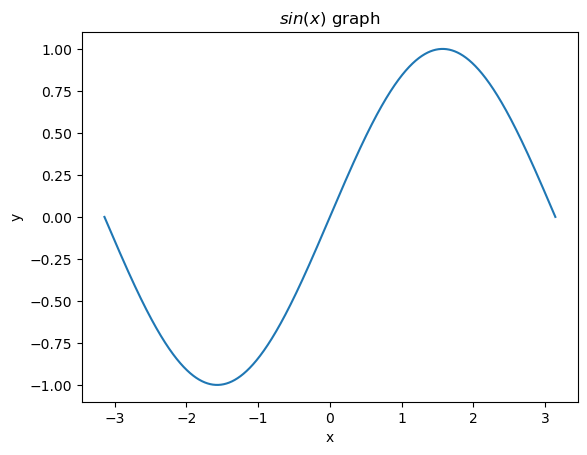

In [33]:
fig,ax = plt.subplots()

ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$sin(x)$ graph')

In [182]:
# 무작위로 가중치를 초기화합니다
a = torch.randn(size = (), device=device, dtype=dtype, requires_grad = True)
b = torch.randn(size = (), device=device, dtype=dtype, requires_grad = True)
c = torch.randn(size = (), device=device, dtype=dtype, requires_grad = True)
d = torch.randn(size = (), device=device, dtype=dtype, requires_grad = True)

Result: y = 0.01285550743341446 + 0.8537873029708862 * P3(-0.0022177868522703648 + -0.0929102674126625 x)


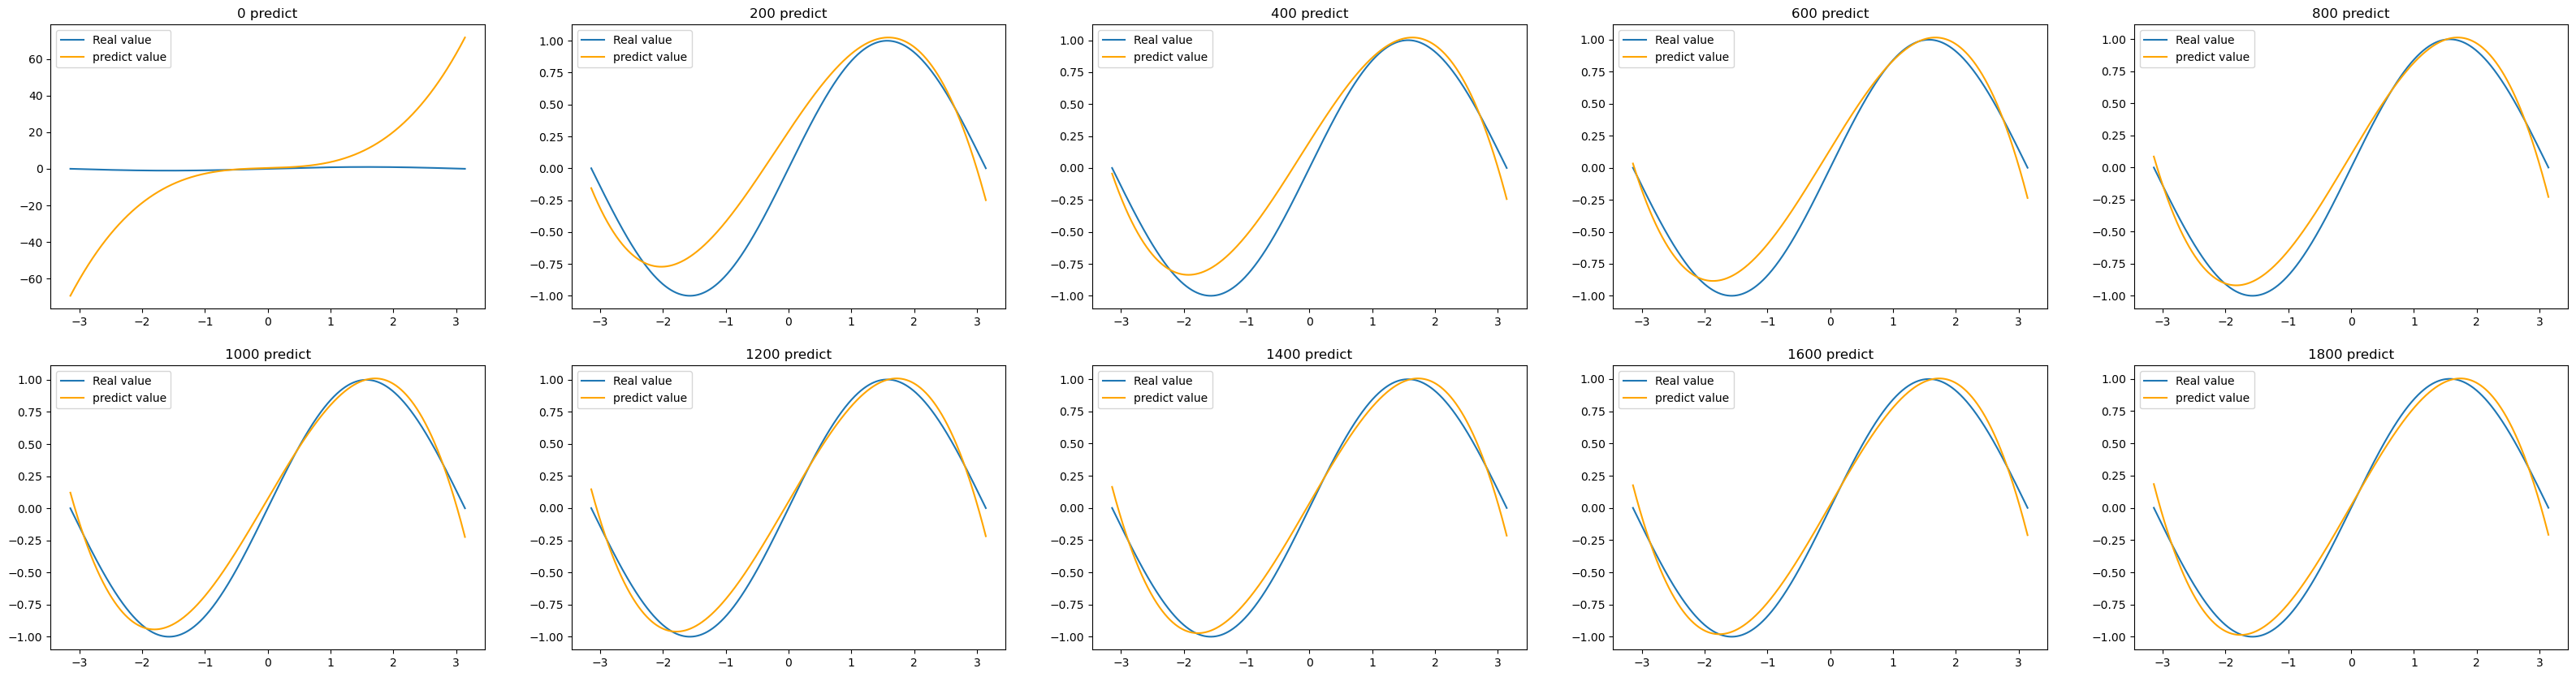

In [183]:
learning_rate = 1e-6

learning_dict = {'loss' : [],
                'a' : [],
                'b' : [],
                'c' : [],
                'd' : []}

fig,ax = plt.subplots(ncols = 5, nrows = 2, figsize = (40,10))
ax = ax.flatten()
idx = 0
for t in range(2000):
    
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 # 다중선형회귀분석형태 
    
    loss = (y_pred - y).pow(2).sum() # 오차제곱합을 계산하고 sclar 형태로 빼오기 위해 item
    
    if t % 200 == 0:
        ax[idx].plot(x,y, label = 'Real value')
        ax[idx].plot(x,y_pred.detach(), label = 'predict value', c = 'orange')
        ax[idx].set_title(f'{t} predict')
        ax[idx].legend()
        idx += 1
        
    # 손실에 따른 a,b,c,d 의 역전파 단계를 계산하기 
    # loss 는 스칼라 값이기 때문에 backward() 가능
    
    loss.backward()
    
    # 경사하강법(gradient descent)을 사용하여 가중치를 직접 갱신합니다.
    # torch.no_grad()로 감싸는 이유는, 가중치들이 requires_grad=True 지만
    # autograd에서는 이를 추적하지 않을 것이기 때문입니다.
    
    with torch.no_grad(): # 이 구문이 시행되는 동안은 a,b,c,d 의 변화를 계산하지마
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        # 이 구문이 끝나고 나면 다시 requires_grad = True 로 변환됨

    learning_dict['loss'].append(loss.item())
    learning_dict['a'].append(a.grad)
    learning_dict['b'].append(b.grad)
    learning_dict['c'].append(c.grad)
    learning_dict['d'].append(d.grad)

    # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
    a.grad = None
    b.grad = None
    c.grad = None
    d.grad = None
    
print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

Text(0, 0.5, 'Partial Gradient')

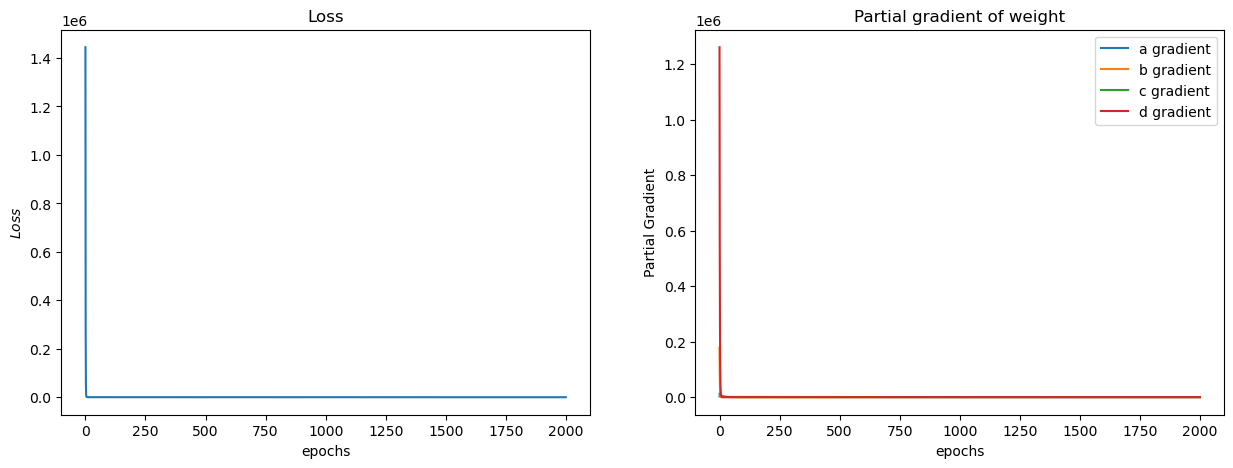

In [184]:
fig,ax = plt.subplots(ncols = 2, figsize = (15,5))

ax[0].plot(learning_dict['loss'])
ax[1].plot(learning_dict['a'], label = 'a gradient')
ax[1].plot(learning_dict['b'], label = 'b gradient')
ax[1].plot(learning_dict['c'], label = 'c gradient')
ax[1].plot(learning_dict['d'], label = 'd gradient')
ax[1].legend()

ax[0].set_title('Loss')
ax[1].set_title('Partial gradient of weight')

ax[0].set_xlabel('epochs')
ax[0].set_ylabel('$Loss$')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Partial Gradient')

### nn 모듈

PyTorch: nn
연산 그래프와 autograd는 복잡한 연산자를 정의하고 도함수(derivative)를 자동으로 계산하는 매우 강력한 패러다임(paradigm)입니다; 하지만 대규모 신경망에서는 autograd 그 자체만으로는 너무 저수준(low-level)일 수 있습니다.

신경망을 구성하는 것을 종종 연산을 계층(layer) 에 배열(arrange)하는 것으로 생각하는데, 이 중 일부는 학습 도중 최적화가 될 학습 가능한 매개변수 를 갖고 있습니다.

텐서플로우(Tensorflow)에서는, Keras 와 TensorFlow-Slim, TFLearn 같은 패키지들이 연산 그래프를 고수준(high-level)으로 추상화(abstraction)하여 제공하므로 신경망을 구축하는데 유용합니다.

파이토치(PyTorch)에서는 nn 패키지가 동일한 목적으로 제공됩니다. nn 패키지는 신경망 계층(layer)과 거의 비슷한 Module 의 집합을 정의합니다. Module은 입력 텐서를 받고 출력 텐서를 계산하는 한편, 학습 가능한 매개변수를 갖는 텐서들을 내부 상태(internal state)로 갖습니다. nn 패키지는 또한 신경망을 학습시킬 때 주로 사용하는 유용한 손실 함수(loss function)들도 정의하고 있습니다.

이 예제에서는 nn 패키지를 사용하여 다항식 모델을 구현해보겠습니다:

In [185]:
# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 이 예제에서, 출력 y는 (x, x^2, x^3)의 선형 함수이므로, 선형 계층 신경망으로 간주할 수 있습니다.
# (x, x^2, x^3)를 위한 텐서를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

```
Q : torch.unsqueeze(-1) 이 하는 역할이 뭐야 ?

A : torch.unsqueeze(-1)는 PyTorch에서 텐서의 차원을 확장(unsqueeze)하는 연산입니다. 특히 -1을 인자로 사용하면 가장 안쪽(마지막) 차원을 확장하게 됩니다. 이 작업은 주로 다른 텐서와의 연산을 수행하기 위해 차원을 일치시키거나, 텐서의 형태를 조정할 때 유용합니다.
```

In [186]:
print(x.shape)
xx = x.unsqueeze(-1)

print(xx.shape) # x 를 dim = -1 로 하고 unsquuze 하면 1차원의 벡터 형태로 변환 

torch.Size([2000])
torch.Size([2000, 1])


In [187]:
# [2000,1] tensor 에 [1,2,3] 씩을 제곱해주면 브로드캐스팅 되어 2000,3 형태의 tensor 반환

xx = xx.pow(p)

print(xx.shape)
print(xx)

# 이전 모델에서는 다항 회귀 분석모델이였기 때문에 입력값들을 먼저 동일하게 제곱 형태로 변경해주자

torch.Size([2000, 3])
tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])


xx 는 입력 벡터 형태로 변환 되어 있음

In [188]:
# nn 패키지를 사용하여 모델을 순차적 계층(sequence of layers)으로 정의합니다.
# nn.Sequential은 다른 Module을 포함하는 Module로, 포함되는 Module들을 순차적으로 적용하여 
# 출력을 생성합니다. 각각의 Linear Module은 선형 함수(linear function)를 사용하여 입력으로부터
# 출력을 계산하고, 내부 Tensor에 가중치와 편향을 저장합니다.
# Flatten 계층은 선형 계층의 출력을 `y` 의 shape과 맞도록(match) 1D 텐서로 폅니다(flatten).


model = torch.nn.Sequential(
    torch.nn.Linear(in_features = 3, out_features = 1, bias = True),
    torch.nn.Flatten(start_dim = 0, end_dim = 1)
)

print(model)

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)


```
Q : torch.nn 은 neural network 의 node 들을 설정하는 클래스야 ?

torch.nn.Linear 할 때 쓰이는 파라미터들에 대해 설명해줘

A : torch.nn 모듈은 PyTorch에서 신경망을 구성하고 훈련하기 위한 다양한 클래스와 함수를 제공하는 모듈입니다. 이 모듈을 사용하여 신경망 모델을 정의하고 다양한 레이어와 연산을 수행할 수 있습니다.

torch.nn.Linear 클래스는 선형 레이어(linear layer)를 정의하는 데 사용됩니다. 선형 레이어는 입력 데이터와 가중치 행렬을 곱하고 편향(bias)을 더하는 연산을 수행합니다. 이를 통해 입력 데이터를 선형 변환하고 출력을 생성합니다.

torch.nn.Linear 클래스의 중요한 파라미터들은 다음과 같습니다:

in_features: 입력 피처의 수를 나타내는 파라미터입니다. 선형 레이어의 입력 차원을 결정합니다.

out_features: 출력 피처의 수를 나타내는 파라미터입니다. 선형 레이어의 출력 차원을 결정합니다.

bias: 편향(bias)을 사용할지 여부를 나타내는 파라미터입니다. 기본적으로 True로 설정되어 있으며, 편향을 사용하려면 True로 유지하거나 False로 설정하여 사용하지 않을 수 있습니다.
```

In [189]:
# 또한 nn 패키지에는 주로 사용되는 손실 함수(loss function)들에 대한 정의도 포함되어 있습니다;
# 여기에서는 평균 제곱 오차(MSE; Mean Squared Error)를 손실 함수로 사용하겠습니다.

loss_fn = torch.nn.MSELoss(reduction='sum')

print(loss_fn)

MSELoss()


In [190]:
learning_rate = 1e-6
for t in range(2000):

    # 순전파 단계: x를 모델에 전달하여 예측값 y를 계산합니다. Module 객체는 __call__ 연산자를 
    # 덮어써서(override) 함수처럼 호출할 수 있도록 합니다. 이렇게 함으로써 입력 데이터의 텐서를 Module에 전달하여
    # 출력 데이터의 텐서를 생성합니다.
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    
    if t % 100 == 99:
        print(t,loss.item())
    
    # 역전파 단계를 실행하기 전에 변화도(gradient)를 0으로 만듭니다.
    model.zero_grad() 
    
    # 역전파 시켜주자 , torch.nn 에 있는 node 들은 모두 require_grads = True 인 형태이다.
    
    loss.backward()
    
    # 경사하강법을 이용해 가중치를 갱신하자
    # 갱신 할 때에는 requires_grads 를 꺼주자
    
    with torch.no_grad():
        for param in model.parameters():
            
            # model.parameters 에는 layer 의 node 의 weight 와 bias 가 존재함
            
            param -= learning_rate * param.grad 
            
# list의 첫번째 항목에 접근하는 것처럼 `model` 의 첫번째 계층(layer)에 접근할 수 있습니다.
linear_layer = model[0]

# 선형 계층에서, 매개변수는 `weights` 와 `bias` 로 저장됩니다.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
    

99 896.80419921875
199 605.6886596679688
299 410.3554992675781
399 279.1867370605469
499 191.0330047607422
599 131.7374267578125
699 91.81784057617188
799 64.9183349609375
899 46.775177001953125
999 34.52631378173828
1099 26.24856948852539
1199 20.648876190185547
1299 16.856849670410156
1399 14.286252975463867
1499 12.541744232177734
1599 11.356557846069336
1699 10.550493240356445
1799 10.001649856567383
1899 9.627518653869629
1999 9.37220573425293
Result: y = -0.018107706680893898 + 0.8409947156906128 x + 0.00312387989833951 x^2 + -0.09109063446521759 x^3


### PyTorch: optim

 지금까지는 torch.no_grad() 로 학습 가능한 매개변수를 갖는 텐서들을 직접 조작하여 모델의 가중치(weight)를 갱신하였습니다. 이것은 확률적 경사하강법(SGD; stochastic gradient descent)와 같은 간단한 최적화 알고리즘에서는 크게 부담이 되지 않지만, 실제로 신경망을 학습할 때는 AdaGrad, RMSProp, Adam 등과 같은 더 정교한 옵티마이저(optimizer)를 사용하곤 합니다.

PyTorch의 optim 패키지는 최적화 알고리즘에 대한 아이디어를 추상화하고 일반적으로 사용하는 최적화 알고리즘의 구현체(implementation)를 제공합니다.

이 예제에서는 지금까지와 같이 nn 패키지를 사용하여 모델을 정의하지만, 모델을 최적화할 때는 optim 패키지가 제공하는 RMSProp 알고리즘을 사용하겠습니다:

In [194]:
# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 입력 텐서 (x, x^2, x^3)를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 optimizer를 정의합니다.
# 여기서는 RMSprop을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을 포함하고 있습니다.
# RMSprop 생성자의 첫번째 인자는 어떤 텐서가 갱신되어야 하는지를 알려줍니다.

learning_rate = 1e-3

optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate)

for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로 
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수들에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 3228.437255859375
199 1674.7059326171875
299 996.9799194335938
399 689.1319580078125
499 506.910400390625
599 360.08026123046875
699 242.27407836914062
799 153.7827911376953
899 91.6492919921875
999 51.265098571777344
1099 27.331687927246094
1199 14.963624000549316
1299 10.068029403686523
1399 8.951432228088379
1499 8.911612510681152
1599 8.946017265319824
1699 8.899916648864746
1799 8.895027160644531
1899 8.910310745239258
1999 8.917182922363281
Result: y = -0.0003196739708073437 + 0.8562318682670593 x + -0.0003210048016626388 x^2 + -0.09384392946958542 x^3


### PyTorch: 사용자 정의 nn.Module

때대로 기존 Module의 구성(sequence)보다 더 복잡한 모델을 구성해야 할 때가 있습니다; 이러한 경우에는 nn.Module 의 하위 클래스(subclass)로 새로운 Module을 정의하고, 입력 텐서를 받아 다른 모듈 및 autograd 연산을 사용하여 출력 텐서를 만드는 forward 를 정의합니다.

이 예제에서는 3차 다항식을 사용자 정의 Module 하위클래스(subclass)로 구현해보겠습니다:

In [204]:
class Polynomial3(torch.nn.Module):
    # Polynomial3 의 부모 생성자는 torch.nn.Module 
    def __init__(self):
        """
        생성자에서 4개의 매개변수를 생성(instantiate)하고, 멤버 변수로 지정합니다.
        """
        super().__init__()
        # super() 를 통해서 부모 생성자인 torch.nn.Modeul 의 생성자를 호출하여 
        # Polynomial3 는 torch.nn 의 모든 기능을 상속 받음
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        
    def forward(self,x):
        
        """
        순전파 함수에서는 입력 데이터의 텐서를 받고 출력 데이터의 텐서를 반환해야 합니다.
        텐서들 간의 임의의 연산뿐만 아니라, 생성자에서 정의한 Module을 사용할 수 있습니다.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    def string(self):
        
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


In [205]:
# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 위에서 정의한 클래스로 모델을 생성합니다.
model = Polynomial3()

# 손실 함수와 optimizer를 생성합니다. SGD 생성자에 model.paramaters()를 호출해주면
# 모델의 멤버 학습 가능한 (torch.nn.Parameter로 정의된) 매개변수들이 포함됩니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)  # 이렇게만 해도 내부적으로 forawrd 를 실행시킴 

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 563.9780883789062
199 401.5758972167969
299 286.6893310546875
399 205.41139221191406
499 147.9093475341797
599 107.22749328613281
699 78.44512939453125
799 58.08140563964844
899 43.673736572265625
999 33.47997283935547
1099 26.267520904541016
1199 21.164419174194336
1299 17.55371856689453
1399 14.998936653137207
1499 13.191261291503906
1599 11.912217140197754
1699 11.007193565368652
1799 10.366817474365234
1899 9.913695335388184
1999 9.593074798583984
Result: y = -0.02946862392127514 + 0.8558569550514221 x + 0.00508382823318243 x^2 + -0.09320465475320816 x^3


```
Q : 그 다음 이 코드에서는 model 에 대한 행동이 하나 없었는데 model 에 있는 a,b,c,d 들이 업데이트 된 원리가 뭐야 ?

A : 이 코드에서 model은 Polynomial3 클래스의 인스턴스로 생성되었습니다. Polynomial3 클래스는 torch.nn.Module을 상속하고 있으며, torch.nn.Parameter로 정의된 a, b, c, d와 같은 매개변수를 가지고 있습니다.

매개변수들 (a, b, c, d)은 torch.nn.Module 클래스의 __init__ 메서드 내에서 torch.nn.Parameter로 정의되었습니다. 이렇게 정의된 매개변수들은 모델의 일부로 간주되며, 모델이 생성될 때 model.parameters()를 사용하여 이러한 매개변수들을 가져올 수 있습니다. 이 매개변수들은 PyTorch의 옵티마이저 (예: SGD, Adam 등)에 의해 업데이트됩니다.
    
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
    
model.parameters()를 사용하여 model에 속한 모든 매개변수들을 옵티마이저에 등록했습니다. 그런 다음 optimizer.step()을 호출하여 역전파(backpropagation)를 수행하고, 옵티마이저에 의해 매개변수들 (a, b, c, d)이 업데이트됩니다.

결과적으로 model의 매개변수들은 학습 중에 손실 함수를 최소화하기 위해 경사 하강법(SGD) 또는 다른 최적화 알고리즘에 의해 업데이트됩니다.
```

# **실습해보기**

Text(0, 0.5, 'y')

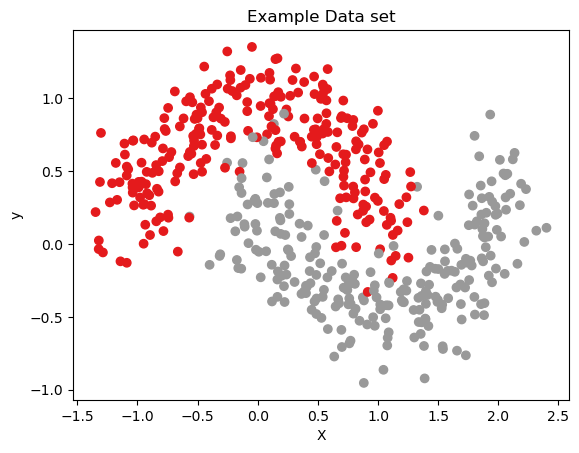

In [438]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.2)

X = torch.tensor(X, dtype = float)
y = torch.tensor(y, dtype = float).unsqueeze(1)

fig,ax = plt.subplots()

ax.scatter(X[:,0],X[:,1], c = y, cmap = 'Set1')

ax.set_title('Example Data set')
ax.set_xlabel('X')
ax.set_ylabel('y')

In [439]:
import torch.nn as nn # 주로 이렇게 불러오니 나도 이렇게 해야겠다.

In [440]:
class SimpleANN(nn.Module):
    
    def __init__(self,input_size, hidden_size, output_size):
        super(SimpleANN, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size, dtype = float)
        self.relu = nn.ReLU() # 활성화 함수
        self.fc2 = nn.Linear(hidden_size, output_size, dtype = float)
        
    def forward(self,x):
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x 

In [441]:
input_dict = {'input_size' : X.shape[1],
                'hidden_size' : 9,
                'output_size' : 1}

model = SimpleANN(**input_dict)

print(model)

SimpleANN(
  (fc1): Linear(in_features=2, out_features=9, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=9, out_features=1, bias=True)
)


In [442]:
# 손실 함수와 옵티마이저 정의:
# 모델을 학습시키기 위해 손실 함수와 옵티마이저를 정의합니다. 분류 문제의 경우 일반적으로 크로스 엔트로피 손실 함수를 사용하고, 옵티마이저로는 확률적 경사 하강법(SGD) 또는 다른 최적화 알고리즘을 선택할 수 있습니다.

creterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [443]:
from mlxtend.plotting import plot_decision_regions

In [444]:
num_epochs = 1000

for epoch in range(num_epochs):
    
    pred = model(X)
    loss = criterion(pred, y) 
    
    optimizer.zero_grad() # 순전파 이후 optimzier 의 gradient 를 0으로 
    loss.backward() # 역전파 계산
    optimizer.step() # 계산된 역전파를 가지고 가중치 업데이트 
    
    if (epoch + 1) % 100 == 0:
        accuracy = torch.mean(((pred > 0.5).float() == y).float())
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, accuracy : {accuracy}')

Epoch [100/1000], Loss: 42.2978, accuracy : 0.8880000114440918
Epoch [200/1000], Loss: 33.1081, accuracy : 0.9240000247955322
Epoch [300/1000], Loss: 26.2089, accuracy : 0.949999988079071
Epoch [400/1000], Loss: 23.2621, accuracy : 0.9539999961853027
Epoch [500/1000], Loss: 22.2466, accuracy : 0.9520000219345093
Epoch [600/1000], Loss: 21.5854, accuracy : 0.9559999704360962
Epoch [700/1000], Loss: 20.8748, accuracy : 0.9559999704360962
Epoch [800/1000], Loss: 20.2628, accuracy : 0.9559999704360962
Epoch [900/1000], Loss: 19.9173, accuracy : 0.9580000042915344
Epoch [1000/1000], Loss: 19.7663, accuracy : 0.9580000042915344
